In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv("genshin_characters_v1.csv")

In [16]:
df["realease_date"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
releases_per_year = df.groupby("release_date").size().reset_index(name="count")

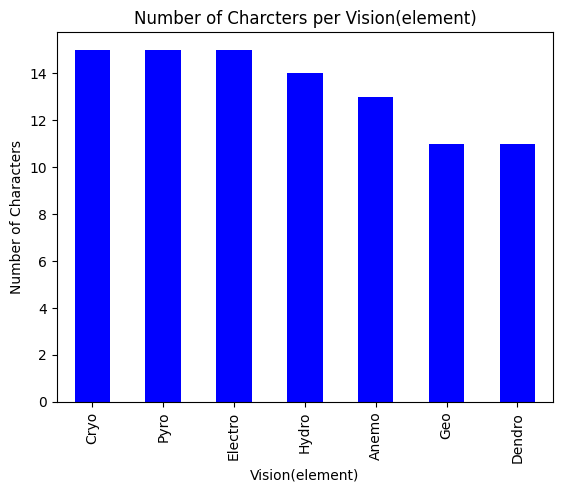

In [17]:
vision_count = df["vision"].value_counts()
vision_count.plot(kind="bar", color="blue")
plt.xlabel("Vision(element)")
plt.ylabel("Number of Characters")
plt.title("Number of Charcters per Vision(element)")
plt.show()

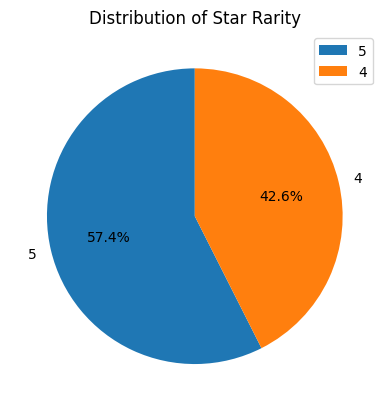

In [18]:
star_count = df["star_rarity"].value_counts()
star_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, legend=True)
plt.ylabel("")
plt.title("Distribution of Star Rarity")
plt.show()

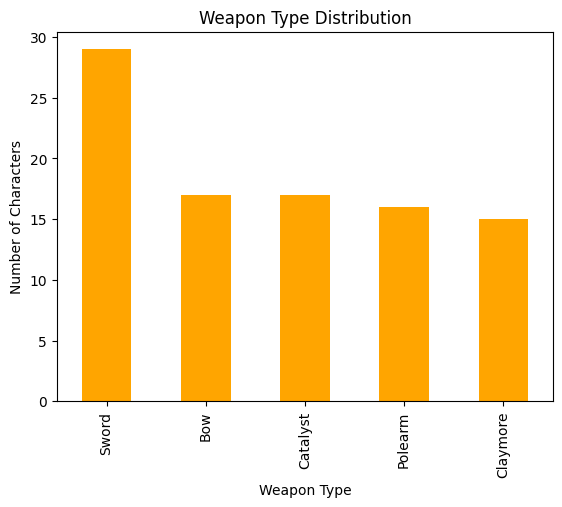

In [19]:
weapon_counts = df["weapon_type"].value_counts()
weapon_counts.plot(kind="bar", color= "orange")
plt.xlabel("Weapon Type")
plt.ylabel("Number of Characters")
plt.title("Weapon Type Distribution")
plt.show()

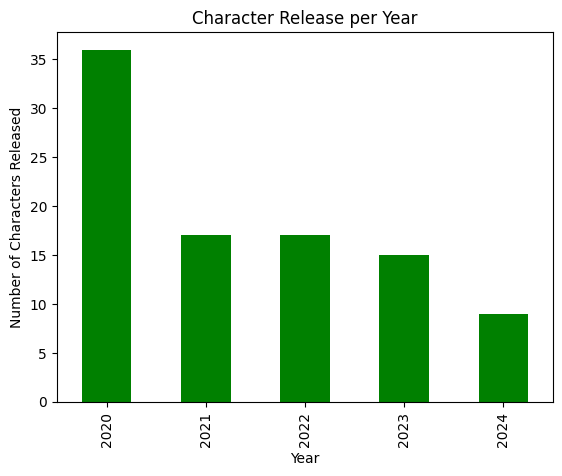

In [20]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
releases_per_year = df.groupby('release_year').size()
releases_per_year.plot(kind="bar", color="green")
plt.xlabel("Year")
plt.ylabel("Number of Characters Released")
plt.title("Character Release per Year")
plt.show()

In [21]:
# "predicting" character release (kinda)
releases_per_year = df.groupby('release_year').size().reset_index(name='count')

X = releases_per_year['release_year'].dropna().values.reshape(-1, 1)
y = releases_per_year['count'].values

model = LinearRegression()
model.fit(X, y)


# Predict for future years (e.g., next 3 years)
future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
predictions = model.predict(future_years)
print(list(zip(future_years.flatten(), predictions)))

[(np.int64(2025), np.float64(1.999999999998181)), (np.int64(2026), np.float64(-3.600000000000364)), (np.int64(2027), np.float64(-9.200000000000728))]


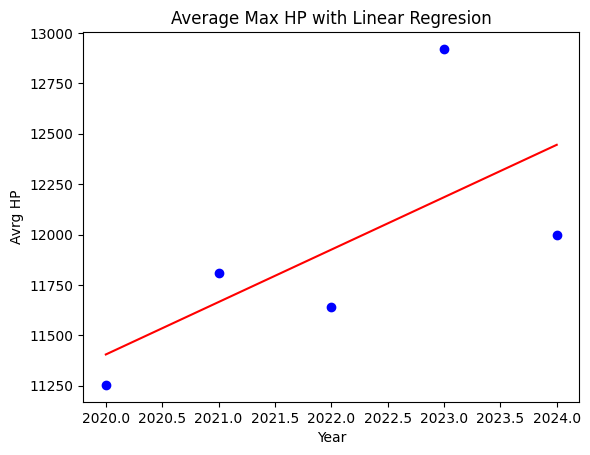

Predicted avg max HP per year : [(np.int64(2025), np.float64(12704.674509803997)), (np.int64(2026), np.float64(12964.552810457535)), (np.int64(2027), np.float64(13224.43111111119))]


In [22]:
# calculate avrg max hp per year
avg_hp_year = df.groupby("release_year")["hp_90_90"].mean().reset_index()

x = avg_hp_year["release_year"].values.reshape(-1,1)
y = avg_hp_year["hp_90_90"].values

model = LinearRegression()
model.fit(x,y)

# Plot Scatter
plt.scatter(X, y, color = "blue",label = "Actual Data")

plt.plot(X, model.predict(X), color = "red", label = "Linear Regresion")
plt.xlabel("Year")
plt.ylabel("Avrg HP")
plt.title("Average Max HP with Linear Regresion")
plt.show()


future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
predictions = model.predict(future_years)
print("Predicted avg max HP per year :", list( zip(future_years.flatten(), predictions)))

In [23]:
df.describe()

,star_rarity,hp_90_90,atk_90_90,def_90_90,hp_80_90,atk_80_90,def_80_90,hp_80_80,atk_80_80,def_80_80,...,atk_20_40,def_20_40,hp_20_20,atk_20_20,def_20_20,hp_1_20,atk_1_20,def_1_20,realease_date,release_year
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,4.574468,11762.000000,249.468085,698.117021,11037.010638,232.095745,649.340426,10400.510638,220.531915,617.276596,...,68.074468,190.808511,2453.095745,51.989362,145.648936,951.329787,19.914894,56.319149,2021.404255,2021.404255
std,0.497074,1608.223919,54.137956,96.443962,1819.188017,50.174549,89.686617,1408.639019,47.484622,84.991891,...,13.980201,25.678021,297.289406,10.388677,19.335581,113.452504,3.856734,7.523744,1.385944,1.385944
min,4.000000,9189.000000,106.000000,499.000000,8553.000000,99.000000,464.000000,8144.000000,94.000000,440.000000,...,29.000000,134.000000,1978.000000,21.000000,100.000000,763.000000,8.000000,38.000000,2020.000000,2020.000000
25%,4.000000,10562.500000,212.000000,628.500000,9822.250000,198.000000,584.250000,9330.250000,188.000000,556.000000,...,59.000000,169.000000,2201.250000,46.000000,129.250000,850.250000,18.000000,50.250000,2020.000000,2020.000000
50%,5.000000,11537.000000,232.500000,683.000000,10732.000000,216.000000,635.000000,10216.000000,205.500000,605.000000,...,63.500000,190.000000,2479.000000,48.500000,147.000000,967.500000,19.000000,57.000000,2021.000000,2021.000000
75%,5.000000,12974.750000,300.500000,764.500000,12062.250000,279.500000,710.500000,11447.500000,265.500000,674.500000,...,81.000000,208.750000,2646.750000,61.000000,158.750000,1030.000000,23.000000,61.750000,2022.750000,2022.750000
max,5.000000,15674.000000,352.000000,959.000000,21080.000000,327.000000,892.000000,13829.000000,310.000000,846.000000,...,94.000000,258.000000,3165.000000,79.000000,194.000000,1220.000000,27.000000,75.000000,2024.000000,2024.000000
